<a href="https://colab.research.google.com/github/mouraffa/Perceptron-with-one-hidden-layer/blob/main/Perceptron_with_one_hidden_layer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **mini-project** : 09 
* **Perceptron with one hidden layer**
   * Architecture
   * learning rule
   * Pseudo-code
   * implementation using python and numpy
   * Application to iris123.siam2 dataset
   * implementation using C++



* **made by** :
   * MOURAFFA YOUSSEF
   * EL JARAI SAFAE

* **supervised by**:
   * professor Abdelaziz Bouroumi


# **Architecture**

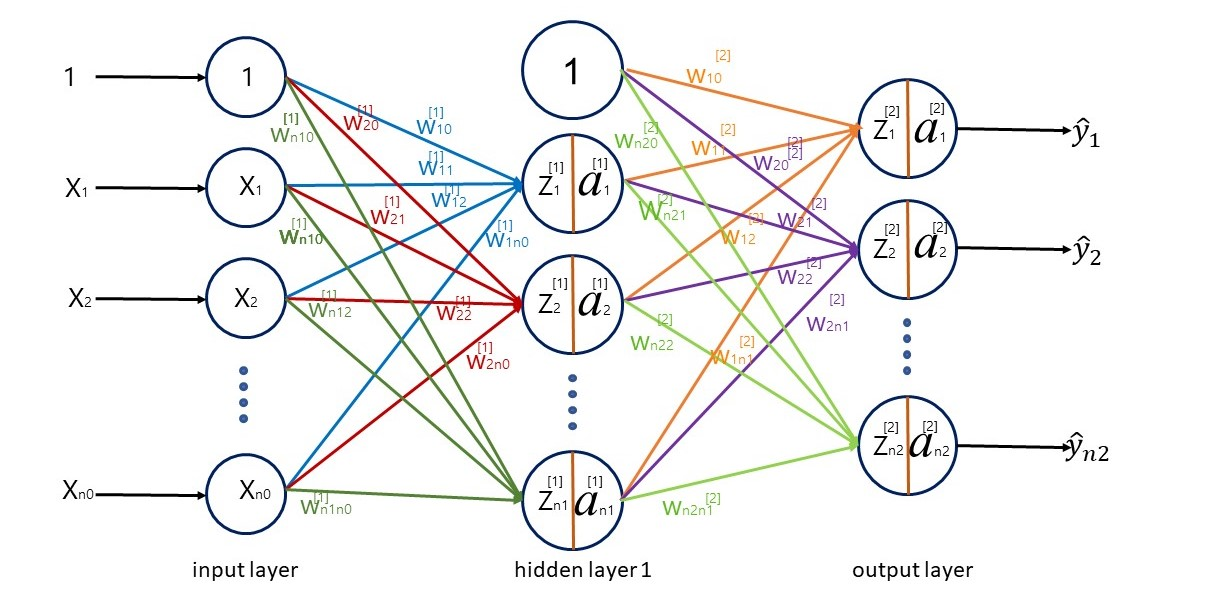

⚡* **Note : ** ⚡
for an PMC**
* The layers close to the input layer are usually called the **lower layers**.

* and the ones close to the outputs are usually called the **upper layers**.

* Every layer except the output layer includes a bias neuron and is **fully-connected** to the next layer.
  

# **learning rule**

learning rule :

$Z_{j} = W_{ji}*X_{i}+b_{j}$
  
$a_{j} = relu(Z_{j})$

$Z_{k} = W_{kj}*a_{j}+b_{k}$

$a_{k}=softmax(Z_{k})$

$J  =1/m\sum\limits_{k=1}^c Y_{K}*log(a_{k})$

learning rule of $W_{kj}$ :

$W_{kj}(t) = W_{kj}(t-1)-α.\frac{\partial J}{\partial W_{kj}}$

$\frac{\partial J}{\partial W_{kj}}$ = $\frac{\partial J}{\partial a_{k}}$.$\frac{\partial a_{k}}{\partial Z_{k}}$.$\frac{\partial Z_{k}}{\partial W_{kj}}$

avec :

$\frac{\partial J}{\partial a_{k}} = -\frac{1}{m}\ \sum\limits_{k=1}^c Y_{K}/a_{k}$


$\frac{\partial a_{k}}{\partial Z_{k}} = a_{k}(δ_{jK} - a_{K})$   avec $ K $ indice de $Z_{k}$ et $k$ indice de $a_{K}$


$\frac{\partial Z_{k}}{\partial W_{kj}} = a_{j}$

alors :
pour $K =k$

$\frac{\partial J}{\partial W_{kj}} = -\frac{1}{m}\ \ Y_{k}(1-a_{k}).a_{j}$ 

pour $K \ne k$

$\frac{\partial J}{\partial W_{kj}} =-\frac{1}{m}\ \sum\limits_{k\ne K} ^c  Y_{k}(-a_{K}).a_{j}$ 




DONC:

$\frac{\partial J}{\partial W_{kj}} = \frac{1}{m}\  [a_{k}-Y_{k}].a_{j}$ 

D' ou :
$W_{kj}(t)=W{kj}(t-1)-α (\frac{1}{m}\ \ [a_{k}-Y_{k}].a_{j})$ 





learning rule of $W_{ji}$ :

$W_{ji}(t) = W_{ji}(t-1)-α.\frac{\partial J}{\partial W_{ji}}$

$\frac{\partial J}{\partial W_{ji}} = \frac{\partial J}{\partial a_{k}}.\frac{\partial a_{k}}{\partial Z_{k}}.\frac{\partial Z_{k}}{\partial a_{j}}.\frac{\partial a_{j}}{\partial Z_{j}}.\frac{\partial Z_{j}}{\partial W_{ji}}$

avec :

$\frac{\partial J}{\partial a_{k}} = -\frac{1}{m}\ \sum\limits_{k=1}^c Y_{K}/a_{k}$


$\frac{\partial a_{k}}{\partial Z_{k}} = a_{k}(δ_{jK} - a_{K})$   avec $ K $ indice de $Z_{k}$ et $k$ indice de $a_{K}$


$\frac{\partial Z_{k}}{\partial a_{j}} = W_{kj}$

$\frac{\partial a_{j}}{\partial Z_{j}} = \ 
relu'(aj) =
\begin{cases}
   1              &\text{si $Zj >0$}\\
   \ 0 &\text{sinon}
\end{cases}
\  $

$\frac{\partial Z_{j}}{\partial W_{ji}} = X_{i}$

DONC:

$\frac{\partial J}{\partial W_{ji}} = \frac{1}{m}\ [\frac{1}{m}\ Wkj.(a_{k}-Y_{k})*relu'(a_j)].Xi$ 

D' ou :
$W_{kj}(t)=W{kj}(t-1)-α (\frac{1}{m}\ [\frac{1}{m}\ Wkj.(a_{k}-Y_{k})*relu'(a_j)].Xi)$ 



# **Pseudo-code**

Given a learning base $X =$ {$x^i , y^i$}  and $(i = 1 , 2, 3, ... , m )$ ;


1.   choose **$α$** , **number of etirations** and a **number of neurons** in the hidden layer.
2.   Assign initial values close to zero to all weights and biases.
3.   repeat {
* for each training data do {
  * calculate $a_i$ the outputs of the different neurons of the different layers, starting with the first
  * for each neuron, $K$ of the output layer , do {
      * ⏩ calculate $e_k$ and $δ_k = (a_k)'$$e_k$
      * ⏩ update the weights of $k$ according to the rule: $w_{ki}(t) = w_{ki}(t-1) - αδ_Ka_k $
  * for each neuron j of the hidden layer
      * ⏩ calculate $δ_j(a_k)'$ $∑$ $δ_k$ $w_kj$
      * ⏩ update the weights of $j$ according to the rule: $w_{ki}(t) = w_{ki}(t-1) - αδ_ja_k $
*}**continue repetition until convergence**





# **implementation using python and numpy**

## 01. required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random



*   [to know more about Numpy library ](https://numpy.org/doc/stable/user/whatisnumpy.html)
*   [to know more about matplotlib library ](https://matplotlib.org/)



## activation functions and their derivatives

* An activation function is a mathematical function that is applied to the output of a neuron in a neural network. It is used to introduce non-linearity into the network, allowing it to learn more complex patterns and relationships between the inputs and outputs


* In this Notebook, we used the four most popular activation functions, that we can test the impact of each one in our neural network

* in the hidden layer we'll use : $stan(x)$  , $sigmoide()$ or $relu(x)$ }

* and we'll use the $Softmax(x)$ function in the last layer for being able to classify the data

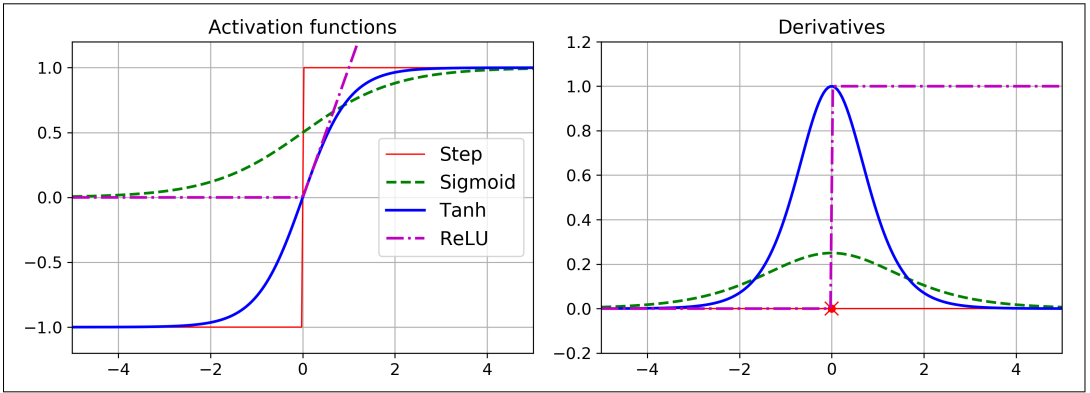

👆 **graphs of the activation functions and their derivatives graphs**

> Indented block



**Sigmoid**:
* $f(z) = \frac{1}{1+e^{-z}}$

**ReLU**:
* $f(z) = \max(0,z)$

**tanh**:
* $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

**$Softmax$** :
* $f(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}$

In [2]:
def sigmoid(x):
    """
    This function takes in an argument x and returns the sigmoid of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The sigmoid of x, which is 1/(1+e^(-x))
    """
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """
    This function takes in an argument x and returns the hyperbolic tangent of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The hyperbolic tangent of x, which is (e^x - e^(-x)) / (e^x + e^(-x))
    """
    return np.tanh(x)

def relu(x):
    """
    This function takes in an argument x and returns the ReLU of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The ReLU of x, which is max(0,x)
    """
    return np.maximum(x, 0)

def softmax(x):
    """
    This function takes in an argument x, which is a list or numpy array and returns the softmax of x.
    
    Parameters:
    x (list or numpy array): The input values
    
    Returns:
    numpy array: The softmax of x, which is e^x / sum(e^x)
    """
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

* The derivative of the activation function in a neural network is used to calculate the gradient during backpropagation, which is the process of adjusting the weights in the network to minimize the error and improve the accuracy of the network's predictions.

* Without the derivative, it would not be possible to update the weights in the network, so the network would not be able to learn from the training data.

Derivative of **sigmoid**:
* $σ'(z) = \frac{d}{dz} (\frac{1}{1+e^{-z}}) = σ(z)(1-σ(z))$

Derivative of **ReLU:**
* $f'(z) = \begin{cases} if 0 & (z<0) \  & and & 1&if  & (z\geq 0) \end{cases}$

Derivative of **tanh**:
* $f'(z) = 1 - f(z)^2$

In [3]:
def sigmoid_derivative(x):
    """
    This function takes in an argument x and returns the derivative of the sigmoid of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The derivative of the sigmoid of x, which is sigmoid(x)*(1-sigmoid(x))
    """
    return sigmoid(x) * (1 - sigmoid(x))


def derivative_tanh(x):
    """
    This function takes in an argument x and returns the derivative of the hyperbolic tangent of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The derivative of the hyperbolic tangent of x, which is 1 - (tanh(x))^2
    """
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    """
    This function takes in an argument x and returns the derivative of the ReLU of x.
    
    Parameters:
    x (float): The input value
    
    Returns:
    float: The derivative of the ReLU of x, which is 1 if x > 0, else 0
    """
    return np.array(x > 0, dtype = np.float32)

## 02.initialization

In [4]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Initialize weights and biases for the first hedden layer and the output layer with random values
    
       - param n_x: size of input layer
       - param n_h: size of hidden layer
       - param n_y: size of output layer (classes' number)

    :return: a dictionary of initialize weights and bias for the first and the second layer
    """

    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## forward propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

In [5]:
def forward_propagation(x, parameters):
    
    """
    Forward propagation through the network

      - param X: input data
      - param parameters : a dictionary that contain the weights and bias for hidden and output layer
        parameters = { "w1" : w1 , "b1" : b1 , "w2" : w2 , "b2" : b2 }
      
    return: output of the network and the activation of the hidden layer 
    using another dictionary : forward_cache = {"z1" : z1 , "a1" : a1 , "z2" : z2 , "a2" : a2 }
    """
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

## the cost function

* the cost function commonly used in neural networks with the $Softmax$ function in the output layer for multi-class classification is called cross-entropy loss. It is a measure of the difference between the predicted class probabilities and the true class labels.

* Here's the mathematical definition of the cross-entropy loss:

   ➡ $Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$


* where $y$ is the true label and $̂ŷ$ is the predicted label. The sum is over all the classes.

* The purpose of using cross-entropy loss is that it is a common choice for multi-class classification problems. It measures the dissimilarity between two probability distributions, in this case, the true labels and the predicted labels. The loss function is used to train the neural network by minimizing the difference between the predicted and true labels.

In [6]:
def cost_function(a2, y):
    """
    Cross-entropy loss function

       - param a2: predicted labels in the output layer
       - param y: true labels

    return: cross-entropy loss
    """
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

##the backward propagation

* for the output layer

   $dZ_2 = ( A_2 - Y )$

   $ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

   $ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$


* for the hidden layer

   $dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

   $dW_1 = \frac{1}{m}.dZ_1.X^T$

   $dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [7]:
def backward_prop(x, y, parameters, forward_cache):
    """
    This function takes four arguments ( x , y , parameters , forward_cache ) and returns the DG of the weights and bais .
    
    Parameters:
    x (float): The input value
    y : true labels
    parameters (dict) : parameters = { "w1" : w1 , "b1" : b1 , "w2" : w2 , "b2" : b2 }
    forward_cache (dict) : forward_cache = {"z1" : z1 , "a1" : a1 , "z2" : z2 , "a2" : a2 } 
    
    Returns:
    float: The derivative of the weights and bais, using the dectionary gradients : 
       gradients = { "dw1" : dw1 , "db1" : db1 , "dw2" : dw2 , "db2" : db2 }
    """
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

## Update Parameters

In [8]:
def update_parameters(parameters, gradients, learning_rate):
    """
     Update the parameters of a neural network with one hidden layer and a softmax output layer:

     This function takes in 4 arguments: a dictionary for the weights and biases, another dictionary
     for the gradients, and the learning rate. The function updates the parameters of the neural network 
      by subtracting the product of the learning rate and the gradients from the weights and biases. 
     The updated parameters are returned as a new dictionary for the weights and biases.

      Parameters:
        - parameters (dict): 
                          - A dictionary containing the weight matrices for the hidden and output layers.
                            The keys should be 'W1' and 'W2' for the hidden and output layers, respectively , 
                          - and also the bias vectors for the hidden and output layers.
                            The keys should be 'b1' and 'b2' for the hidden and output layers, respectively.
      
        - gradients (dict): A dictionary containing the gradients for the weight matrices and bias vectors.
                            The keys should be 'dW1', 'db1', 'dW2', and 'db2' for the hidden and output layers, respectively.

        - learning_rate (float): The learning rate for the update step.
    
    Returns:
        - new_parameters (dict): A dictionary containing the updated weight matrices for the hidden and output layers, and the updated bias vectors for the hidden and output layers.
    
    """
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## the Complete Model

In [9]:
def model(x, y, n_h, learning_rate, iterations):
    """
    Train a neural network with one hidden layer and a softmax output layer on the given input data and true labels.
    
    Parameters:
        - x (numpy array): The input data of shape (num_samples, num_features).
        - y (numpy array): The true labels of shape (num_samples, num_classes).
        - n_h (int): The number of neurons in the hidden layer.
        - learning_rate (float): The learning rate for the update step.
        - iterations (int): The number of iterations to train the model for.
    
    Returns:
        - parameters (dict): A dictionary containing the learned weight matrices and bias vectors for the hidden and output layers.
        - cost_list (list): A list containing the values of the loss function at each iteration during the training process.
    """
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

#**test with the iris datasets**

## read the iris datasets

In [10]:
m , n , cla = 153 , 5 , 3
x = np.ones((m,n))
with open ('iris123.siam2', 'r') as f:
  for i in range(0 , m):
    numbers_lst = f.readline().split('\t')
    #print(numbers_lst)
    if( i >= 3):
      #l
      for t in range(0 , n):
        #l
        x[i , t] = np.array(numbers_lst[t])
X3 = x[3 : , :4]
y3 = x[3 : , -1]
#print("shape(X) : " , np.shape(X))
#X


In [11]:
print(np.shape(X3))
print(np.shape(y3))

(150, 4)
(150,)


## one-hot encoding

One-hot encoding is a technique used in machine learning and data analysis to represent categorical data using a binary array. Each unique category is assigned a unique binary vector, with a 1 in the position corresponding to that category, and 0s in all other positions. This allows the categorical data to be input into a machine learning model that requires numerical input.

for our datasets :
*  0 ➡ [1 0 0]
*  1 ➡ [0 1 0]
*  2 ➡ [0 0 1]

In [12]:
c1 = np.array([1 , 0 , 0 ])
c2 = np.array([0 , 1 , 0 ])
c3 = np.array([0 , 0 , 1 ])

new_y3 = np.zeros((150,3))
for i in range(150):
  c = y3[i]
  if c == 0:
    new_y3[i]=c1
  if c == 1:
    new_y3[i]=c2
  if c ==2 :
    new_y3[i]=c3
y3 = new_y3

shape verification

In [13]:
print(np.shape(X3))
print(np.shape(y3))

(150, 4)
(150, 3)


shape modification

In [14]:
X3 = X3.T
y3 = y3.T

In [15]:
print(np.shape(X3))
print(np.shape(y3))

(4, 150)
(3, 150)


## testing the model 

In [16]:
iterations = 10000
n_h = 1024  # 2^n : to benefit the use of GPUs on multiprocessing
learning_rate = 0.08
Parameters, Cost_list = model(X3, y3, n_h = n_h, learning_rate = learning_rate, iterations = iterations)


Cost after 0 iterations is : 1.095431646149619
Cost after 1000 iterations is : 0.2703054689188591
Cost after 2000 iterations is : 0.14841838040570093
Cost after 3000 iterations is : 0.10718625314268063
Cost after 4000 iterations is : 0.0888638780039913
Cost after 5000 iterations is : 0.07881239978447359
Cost after 6000 iterations is : 0.07250585315378227
Cost after 7000 iterations is : 0.06817923311288714
Cost after 8000 iterations is : 0.065020803769904
Cost after 9000 iterations is : 0.06260655352994787


## ploting the cost function

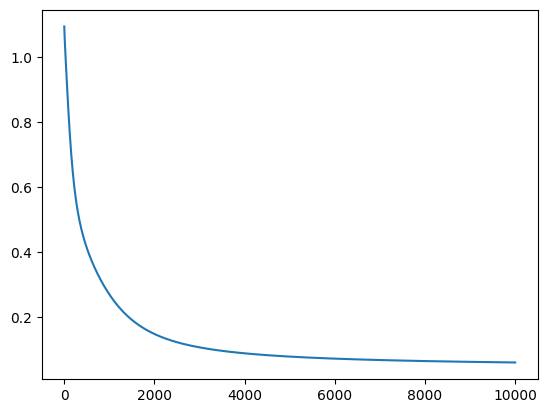

In [17]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [18]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [19]:
print("Accuracy of Train Dataset", accuracy(X3, y3, Parameters), "%")
#print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 98.66666666666667 %


# **implementation using C++**

In [20]:
%%writefile MLP_2022_2023.cpp
//multi layered perceptron with one hidden layer
//- syntaxe d'appel :
//  Prg <datafile> [alpha][iterations][n_h]
//base de test : iris123.siam2
#include <iostream>
#include <algorithm> 
#include <cmath>
#include <vector> 
#include "siam2022-2023.hpp"

// ReLU activation function
/*vector<double> relu(double*input) {
    vector<double> output = *input;
    for (int i = 0; i < output.size(); i++) {
        if (output[i] < 0) {
            output[i] = 0;
        }
    }
    return output;
}*/
double relu(double x) {
    if (x < 0) {
        return 0;
    } else {
        return x;
    }
}

// relu Derivative
double relu_derivative(double x) {
    if (x > 0) {
        return 1;
    } else {
        return 0;
    }
}

double* softmax(double* input, int size) {
    double sum = 0.0;
    double* output = new double[size];
    for (int i = 0; i < size; i++) {
        output[i] = exp(input[i]);
        sum += output[i];
    }
    for (int i = 0; i < size; i++) {
        output[i] /= sum;
    }
    return output;
}
// onehot encoding
double** one_hot_encode(int* input_data, int n, int num_classes) {
    double** one_hot_encoded = new double*[n];

    for (int i = 0; i < n; i++) {
        one_hot_encoded[i] = new double[num_classes];
        for (int j = 0; j < num_classes; j++) {
            one_hot_encoded[i][j] = (input_data[i] == j) ? 1.0 : 0.0;
        }
    }
    return one_hot_encoded;
}

int main(int argc, char* argv[]) {
  if((argc < 2) || argc > 6) {
  cout << argv[0] << ": syntaxe: "
       << "Prg <dataFile>[alpha][iterations][nb_of_neuones_of_hidden_layer]\n";
  exit(1);  
  } 


// 01.declaration et definition des variables
string datafile = argv[1];
ifstream f(argv[1]);
int m,n,c;
f >> m >> n >> c; f.close();
double **x ; 
int *y ;
float *yhat;
//std::vector<std::vector<double>> X;
std::vector<std::vector<double>> w1;
std::vector<double> b1;
std::vector<std::vector<double>> w2;
std::vector<double> b2;
vector<double> Jw;
ofstream g1("Jw.tmp"); // pour sauvegarder les Jw(t)

float alpha = 0.1 ; if (argc > 2 ) alpha = atof(argv[2]);
int iterations =10000; if(argc > 3 ) iterations = atoi(argv[3]);
int n_h = 1024 ; if (argc > 4) n_h = atoi(argv[4]);

// lecture des donnees 
x = new double*[m];
for(int i=0; i<m; i++)
  x[i]= new double[n+2];
y = new int[m];
yhat = new float[m];
for (int i=0; i<m; i++) { 
for(int j = 0 ; j<=n+1 ;j++) f >> x[i][j];
y[i] = x[i][n+1];
}f.close();

//initialisation des poids

w1 = std::vector<std::vector<double>>(n_h, std::vector<double>(n));
b1 = std::vector<double>(n);
w2 = std::vector<std::vector<double>>(c, std::vector<double>(n_h));
b2 = std::vector<double>(c);

for (int i = 0; i < n_h; i++) {
    for (int j = 0; j < n; j++) {
      w1[i][j] = rand() / double(RAND_MAX); // rand return number between [0,RAND_MAX]
    }
  }
for (int i = 0; i < n ; i++) {
    b1[i] = rand() / double(RAND_MAX);;
  }
  
  int t =0;
  do{
t++;
//forward propagation 
double *z1 ;
z1 = new double[n_h];
for (int i = 0; i < n_h ; i++) {
      z1[i]=0;
        for (int j = 0; j < n; j++) {
               z1[i] += (w1[i][j] * x[j][1])+b1[j];
            }
        }
  double *a1;
  a1 = new double [n_h];
  for (int i=0;i<n_h;i++){
  a1[i] = relu( z1[i]); 
   }
 double *z2 ;
z2 = new double[c];
for (int i = 0; i < c ; i++) {
      z2[i]=0;
        for (int j = 0; j < n_h; j++) {
               z1[i] += (w2[i][j] * a1[j])+b1[j];
            }
        }  
double *a2;
a2 = new double [c];
a2 = softmax(z2, c);

// one-hot encoding of the reel outputs
double **Y;
 Y = new double*[m];

 Y = one_hot_encode(y, m , c);
 //cross-entropy loss function
 double cost;
 for(int i=0;i<c;i++){
   cost=0;
   for(int j=0;j<m;j++){
     cost-= Y[j][i]*log(a2[i]);
   }
 }
 //back-propagation
 //output layer
 double *dz2;
 dz2 = new double[c];
 for(int i=0;i<c ; i++){
    
    dz2[i]=a2[i]-Y[i][1];
 }
 double **dw2;
dw2 = new double*[c];
for (int i = 0; i < c ; i++) {
  dw2[i] = 0;
        for (int j = 0; j < n_h; j++) {
            
            dw2[i][j]=dz2[i]*a1[j];
        }
 }
 double *db2;
 db2 = new double[c];
 for(int i=0;i<c;i++){
 db2[i] += dz2[1];
}
//hidden layer
 double *dz1;
 dz1 = new double[n_h];
 for(int i=0;i<n_h ; i++){
   dz1[i]=0;
    
        for (int j = 0; j < c; j++) {
          w2[j][i]=w2[i][j];
               z1[i] += (w2[i][j]*relu_derivative(z2[j])*dz2[j]);
            }
        }  
  double **dw1;
dw1 = new double*[n_h];
for (int i = 0; i < n_h ; i++) {
  dw1[i] = 0;
        for (int j = 0; j < n; j++) {
        x[j][i]=x[i][j];
        dw1[i][j]=dz1[i]*x[i][j] ;           
            
        }
 }   
 double *db1;
 db2 = new double[n];
 for(int i=0;i<n;i++){
 db2[i] += dz1[1];
}
//updating parameters
for(int i=0;i<n_h;i++){
  for(int j=0;j<n;j++){
    w1[i][j]-=alpha*dw1[i][j];
  }
}
for(int i=0;i<n;i++){
    b1[i]-=alpha*db1[i];
  }
for(int i=0;i<c;i++){
  for(int j=0;j<n_h;j++){
    w2[i][j]-=alpha*dw2[i][j];
  }
}

for(int i=0;i<n_h;i++){
    b2[i]-=alpha*db2[i];
  }
  //sauvegarde et affichage de Jw(t)
  Jw.push_back(cost/m);
  if(t % 100==0){
    g1 << Jw[t] << endl;
    cout << "erreur moyenne a l'epoque"  << t << ":\t" << Jw[t] << endl;
  
  }
} while (t<iterations);
g1.close();

 cout << "m=" << m << ",n =" << n << endl;
  cout << "Jw(t = " << Jw[t] << endl;
  cout << "t = " << t << endl;
}

Writing MLP_2022_2023.cpp


In [21]:
!ls -all

total 44
drwxr-xr-x 1 root root 4096 Apr 12 23:02 .
drwxr-xr-x 1 root root 4096 Apr 12 22:58 ..
drwxr-xr-x 4 root root 4096 Apr 11 13:32 .config
-rw-r--r-- 1 root root 5411 Apr 12 23:00 iris123.siam2
-rw-r--r-- 1 root root 3611 Apr 12 23:00 iris12.siam2
-rw-r--r-- 1 root root 2411 Apr 12 23:00 iris13.siam2
-rw-r--r-- 1 root root 3511 Apr 12 23:00 iris23.siam2
-rw-r--r-- 1 root root 5312 Apr 12 23:02 MLP_2022_2023.cpp
drwxr-xr-x 1 root root 4096 Apr 11 13:33 sample_data


**you should upload the executable siam 2022-2023.o first.**

In [22]:
!g++ MLP_2022_2023.cpp siam2022-2023.o -o MLP

g++: error: siam2022-2023.o: No such file or directory


In [23]:
!./MLP

/bin/bash: ./MLP: No such file or directory


In [24]:
!./MLP iris123.siam2

/bin/bash: ./MLP: No such file or directory
